# Business Understanding

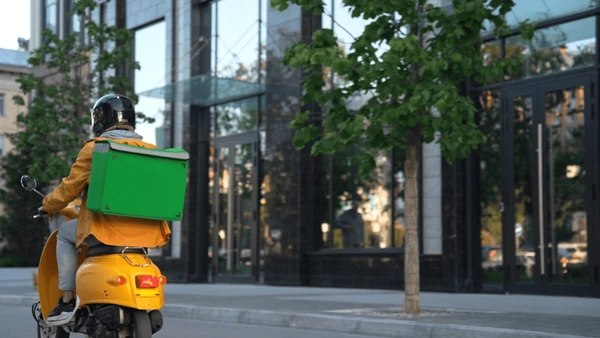

**Business Problem:**  

A food delivery service company has observed a decline in customer satisfaction due to frequent delivery delays. These delays not only frustrate customers but also lead to operational inefficiencies, such as increased fuel costs and overworked delivery personnel. Additionally, with competitors offering faster delivery services, the company risks losing market share. To address these challenges, the company aims to optimize delivery times by leveraging predictive models that analyze factors such as traffic, weather conditions, and delivery personnel performance. The goal is to enhance customer satisfaction, reduce operational costs, and gain a competitive edge in the market.


# Data Understanding


The dataset, Food_Time_new.csv, sourced from Kaggle, is specifically designed to predict food delivery times with high accuracy. It includes a diverse range of features such as weather conditions, traffic levels, and vehicle types, offering a comprehensive approach to building a robust predictive model.

This dataset is highly relevant to the business problem as it allows the company to:

1. Identify key factors contributing to delivery delays, such as weather conditions, traffic congestion, and delivery distances.
2. Optimize delivery routes and resource allocation, ensuring better efficiency.
3. Provide more accurate estimated delivery times to customers, improving satisfaction and retention.


# 1: Import Libraries

In [299]:
# Import necessary libraries
# Data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning and preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


# Evaluation metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 2: Load and Explore the Dataset

In [300]:
# Load the dataset
df = pd.read_csv('Food_Time_new.csv')

# Work on a copy of the dataset to preserve the original data
df1 = df.copy()

# Display the first few rows
df1.head()

,Traffic_Level,ID,Delivery_person_ID,weather_description,Type_of_order,Type_of_vehicle,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,temperature,humidity,precipitation,Distance (km),TARGET
0,High,70A2,CHENRES12DEL01,mist,Snack,scooter,32,4.6,12.972.793,80.249.982,13.012.793,80.289.982,26.55,87.0,0.0,9.89,43.45
1,High,95B4,RANCHIRES15DEL01,clear sky,Meal,scooter,33,4.7,23.369.746,8.533.982,23.479.746,8.544.982,17.51,69.0,0.0,19.11,3.816.666.667
2,High,CDCD,DEHRES17DEL01,clear sky,Snack,motorcycle,36,4.2,30.327.968,78.046.106,30.397.968,78.116.106,12.44,77.0,0.0,11.59,3.636.666.667
3,High,2784,PUNERES13DEL03,clear sky,Drinks,scooter,23,4.7,1.856.245,73.916.619,1.865.245,74.006.619,19.37,65.0,0.0,21.93,49.45
4,High,6F67,HYDRES14DEL01,overcast clouds,Snack,motorcycle,34,4.9,17.426.228,78.407.495,17.496.228,78.477.495,21.29,64.0,0.0,18.26,5.248.333.333


# 3: Perform Exploratory Data Analysis (EDA)

## Checking for Missing Values & Data Types

In [235]:
# Check for missing values
print("\nMissing Values Summary:")
print(df1.isnull().sum())

# Check data types
print("\nDataset Information:")
df1.info()

# Basic statistics
print("\nSummary Statistics:")
df1.describe()


Missing Values Summary:
Traffic_Level                  915
ID                               0
Delivery_person_ID               0
weather_description              5
Type_of_order                    0
Type_of_vehicle                  0
Delivery_person_Age              0
Delivery_person_Ratings          0
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
temperature                      5
humidity                         5
precipitation                    5
Distance (km)                  920
TARGET                         541
dtype: int64

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Traffic_Level                9085 non-null   object 
 1   ID                           10000 non-null  object 
 2   

,Delivery_person_Age,Delivery_person_Ratings,temperature,humidity,precipitation,Distance (km)
count,10000.000000,10000.000000,9995.000000,9995.000000,9995.000000,9080.000000
mean,29.522000,4.629370,22.936907,66.164882,0.016233,14.292747
std,5.700348,0.322941,3.379448,15.602939,0.074911,8.376254
min,15.000000,1.000000,6.770000,27.000000,0.000000,1.550000
25%,25.000000,4.500000,20.140000,54.000000,0.000000,7.620000
50%,29.000000,4.700000,23.000000,67.000000,0.000000,13.400000
75%,34.000000,4.800000,25.980000,81.000000,0.000000,19.610000
max,50.000000,6.000000,29.050000,94.000000,1.460000,59.840000


## Data Distribution: Delivery Times

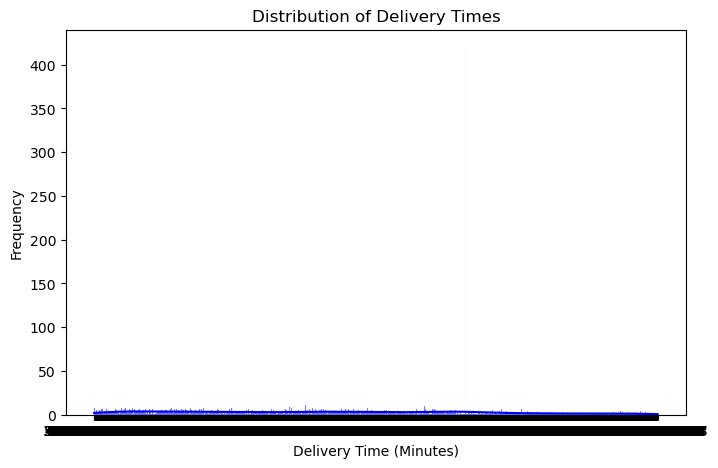

In [210]:
# Visualizing the distribution of delivery times
plt.figure(figsize=(8, 5))
sns.histplot(df1['TARGET'], bins=30, kde=True, color='blue')
plt.title("Distribution of Delivery Times")
plt.xlabel("Delivery Time (Minutes)")
plt.ylabel("Frequency")
plt.show()

## Feature Correlation

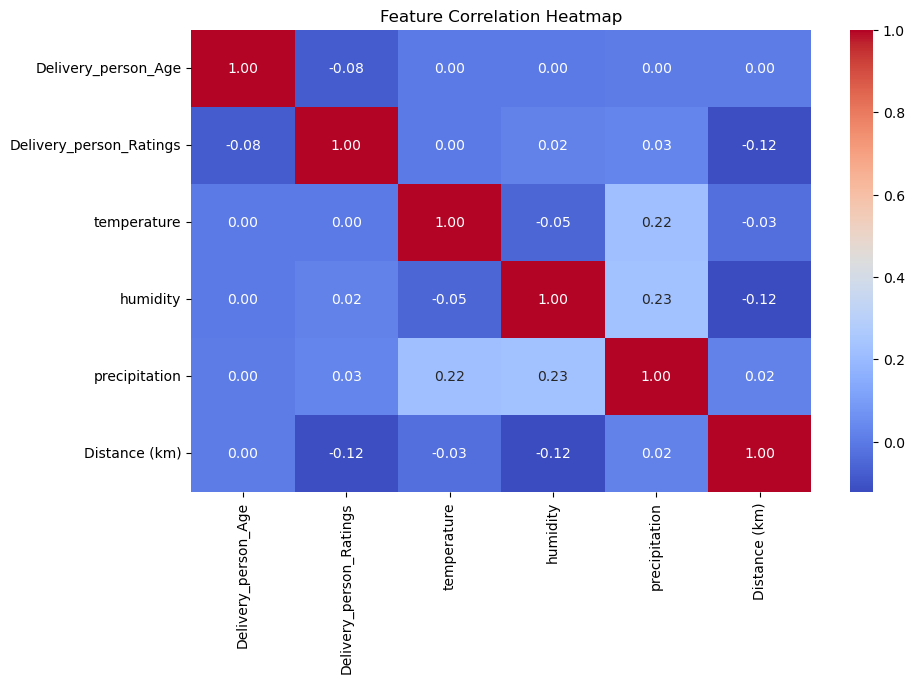

In [211]:
# Checking correlation between numerical features
numerical_df = df1.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# 4: Handle Missing Data and Data Cleaning

## Fixing Incorrect Data Types

In [262]:
# Convert coordinates & distance to numeric
numeric_cols = ['Restaurant_latitude', 'Restaurant_longitude', 
                'Delivery_location_latitude', 'Delivery_location_longitude', 'Distance (km)']

for col in numeric_cols:
    df1[col] = pd.to_numeric(df1[col], errors='coerce')


## Handling Outliers in Distance

In [263]:
# Checking distance summary
print("\nDistance (km) Summary:")
print(df1['Distance (km)'].describe())

# Fixing Outliers using IQR Method
Q1 = df1['Distance (km)'].quantile(0.25)
Q3 = df1['Distance (km)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df1['Distance (km)'] = np.where(df1['Distance (km)'] > upper_bound, upper_bound, df1['Distance (km)'])
df1['Distance (km)'] = np.where(df1['Distance (km)'] < lower_bound, lower_bound, df1['Distance (km)'])



Distance (km) Summary:
count    9080.000000
mean       14.292747
std         8.376254
min         1.550000
25%         7.620000
50%        13.400000
75%        19.610000
max        59.840000
Name: Distance (km), dtype: float64


## Handling Missing Values

In [264]:
# Fill missing numerical values with median
num_imputer = SimpleImputer(strategy='median')
numerical_cols = ['Delivery_person_Age', 'Delivery_person_Ratings', 'temperature', 'humidity', 
                  'precipitation', 'Distance (km)']
df1[numerical_cols] = num_imputer.fit_transform(df1[numerical_cols])

# Fill missing categorical values with the most frequent value (mode)
cat_imputer = SimpleImputer(strategy='most_frequent')
categorical_cols = ['Traffic_Level', 'weather_description', 'Type_of_order', 'Type_of_vehicle']
df1[categorical_cols] = cat_imputer.fit_transform(df1[categorical_cols])

In [265]:
# Convert categorical variables to numerical using Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df1[col] = le.fit_transform(df1[col])
    label_encoders[col] = le  # Store the encoder for future use

# 5: Feature Engineering

In [266]:
# Create a new feature: Delivery Speed (Distance / Delivery Time)
# Convert TARGET column to numeric, handling errors
df1['TARGET'] = pd.to_numeric(df1['TARGET'], errors='coerce')
# Handle missing values in TARGET (impute with median)
df1.loc[:, 'TARGET'] = df1['TARGET'].fillna(df1['TARGET'].median())

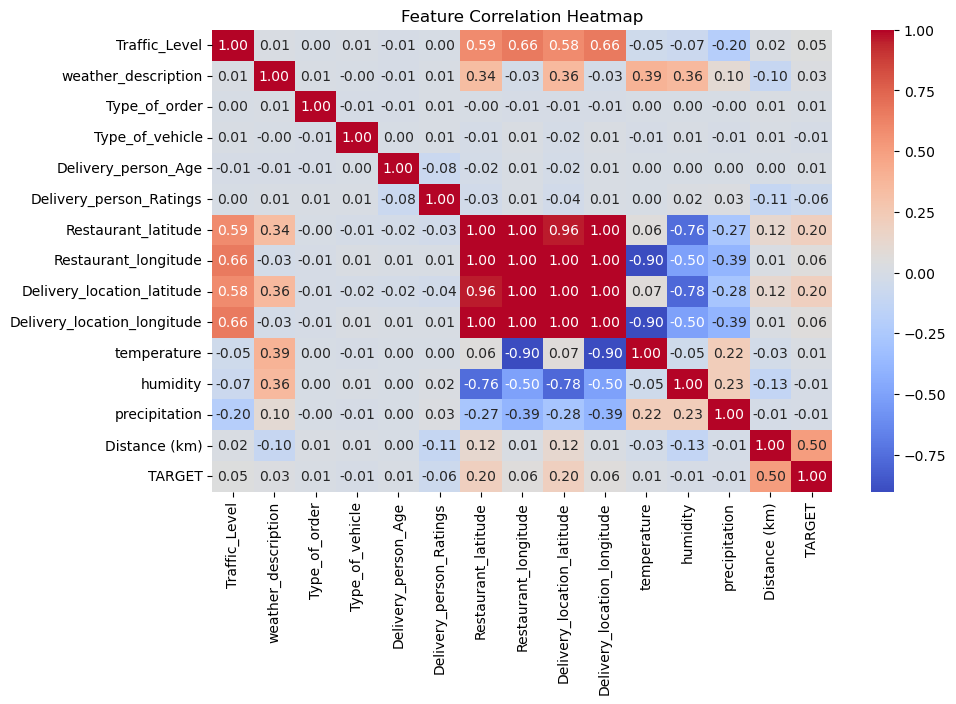

In [267]:
# Display correlation heatmap for numeric variables
numeric_df = df1.select_dtypes(include=['number'])  # Keep only numeric columns
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

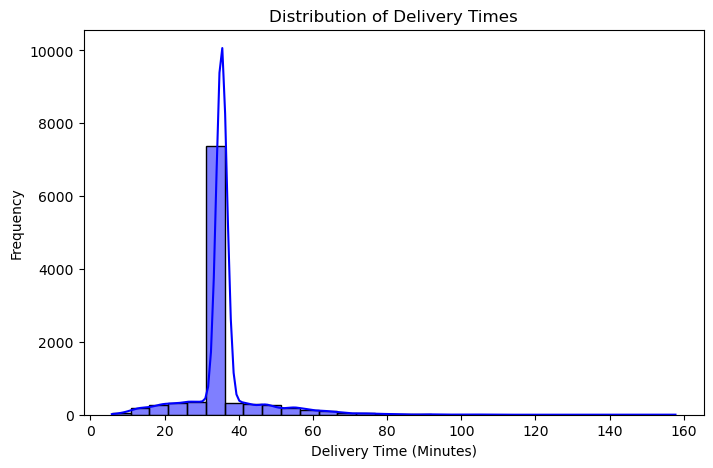

In [268]:
# Visualizing the distribution of delivery times
plt.figure(figsize=(8, 5))
sns.histplot(df1['TARGET'], bins=30, kde=True, color='blue')
plt.title("Distribution of Delivery Times")
plt.xlabel("Delivery Time (Minutes)")
plt.ylabel("Frequency")
plt.show()

In [270]:
lat_long_cols = ['Restaurant_latitude', 'Restaurant_longitude', 
                 'Delivery_location_latitude', 'Delivery_location_longitude']
df1[lat_long_cols] = df1[lat_long_cols].fillna(df1[lat_long_cols].median())

In [301]:
# Feature Engineering: Delivery Speed (Avoiding Division by Zero)
df1['Delivery_Speed'] = df1['Distance (km)'] / (df1['TARGET'].replace(0, np.nan) + 1e-6)
print(df1['Delivery_Speed'])

TypeError: can only concatenate str (not "float") to str

In [272]:
# Final Check: Ensure data is clean
print("\nFinal Dataset Summary:")
print(df1.info())
print(df1.head())
print(df1.isnull().sum())


Final Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Traffic_Level                10000 non-null  int32  
 1   ID                           10000 non-null  object 
 2   Delivery_person_ID           10000 non-null  object 
 3   weather_description          10000 non-null  int32  
 4   Type_of_order                10000 non-null  int32  
 5   Type_of_vehicle              10000 non-null  int32  
 6   Delivery_person_Age          10000 non-null  float64
 7   Delivery_person_Ratings      10000 non-null  float64
 8   Restaurant_latitude          10000 non-null  float64
 9   Restaurant_longitude         10000 non-null  float64
 10  Delivery_location_latitude   10000 non-null  float64
 11  Delivery_location_longitude  10000 non-null  float64
 12  temperature                  10000 non-null  float6

# 6: Convert the target variable into binary

In [293]:
df['TARGET'] = df['TARGET'].map({'Yes': 1, 'No': 0})

# 7: Split Data into Training and Testing Sets

In [298]:
#⃣  Split Data into Training & Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

ValueError: Input y contains NaN.

## Identify & Remove Non-Numeric Columns

In [274]:
# Identify non-numeric columns
non_numeric_cols = X_train.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: Index(['Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude'],
      dtype='object')


In [275]:
X_train = X_train.drop(columns=non_numeric_cols)
X_test = X_test.drop(columns=non_numeric_cols)

In [276]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure both have the same features
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

## Convert Numeric Columns & Fix Formatting Issues

In [277]:
for col in X_train.columns:
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

## Handle Missing Values (After Conversion)

In [278]:
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

# 8: Feature Scaling

In [279]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 9: Baseline Model: Logistic Regression

In [282]:
# Initialize and train the logistic regression model
baseline_model = LogisticRegression()
baseline_model.fit(X_train_scaled, y_train)

# Make predictions
baseline_pred = baseline_model.predict(X_test_scaled)

# Calculate accuracy
baseline_acc = accuracy_score(y_test, baseline_pred)

# Print the accuracy
print(f"Baseline Model (Logistic Regression) Accuracy: {baseline_acc:.4f}")

Baseline Model (Logistic Regression) Accuracy: 0.8965


# 10: Train Intermediate Models & Compare Performance

In [284]:
# Train Intermediate Models & Compare Performance
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")


Random Forest Accuracy: 0.7410
Gradient Boosting Accuracy: 0.7115
SVM Accuracy: 0.9380


# 11: Choose Final Model

In [285]:
# Choose Final Model (Random Forest)
final_model = RandomForestClassifier(n_estimators=100, random_state=42)
final_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

# 12: Model Evaluation

In [286]:
# Model Evaluation
y_pred = final_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nFinal Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Final Model Accuracy: 0.7410
Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.97      0.53       301
           1       0.99      0.70      0.82      1699

    accuracy                           0.74      2000
   macro avg       0.68      0.84      0.68      2000
weighted avg       0.90      0.74      0.78      2000

Confusion Matrix:
 [[ 292    9]
 [ 509 1190]]


# 13: Predictions on New Data

In [291]:
# Ensure new_data has the correct number of features (11)
new_data = np.array([[0.5, -1.2, 3.4, 2.1, 0.0, 1.3, -0.7, 2.8, 1.1, -2.4, 0.9]])  

# Convert to DataFrame using the same column names as X_train
new_data_df = pd.DataFrame(new_data, columns=X_train.columns)

# Ensure the column order matches training data
new_data_df = new_data_df.reindex(columns=X_train.columns)

# Scale the new data using the same scaler
new_data_scaled = scaler.transform(new_data_df)

# Make predictions
new_prediction = model.predict(new_data_scaled)
print("Predicted Class:", new_prediction[0])


Predicted Class: 1


# 14: Save the Final Model for Deployment

In [117]:
import joblib

joblib.dump(best_model, "final_delivery_model.pkl")
print("\nFinal model saved as 'final_delivery_model.pkl'. Ready for deployment!")


Final model saved as 'final_delivery_model.pkl'. Ready for deployment!
